In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup
import requests
import re

import os
#chromedriver = "/Users/ljborton/Downloads/chromedriver" # path to the chromedriver executable
chromedriver = "/Users/laura.borton/Documents/python_stuff/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

driver = webdriver.Chrome(chromedriver)

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
%matplotlib inline

In [3]:
mpl.rcParams['figure.dpi'] = 100

In [62]:
#driver.get("https://www.rottentomatoes.com/top/bestofrt/top_100_mystery__suspense_movies/")
#driver.get("https://www.rottentomatoes.com/top/bestofrt/top_100_horror_movies/")
#driver.get("https://www.rottentomatoes.com/top/bestofrt/top_100_kids__family_movies/")
#driver.get("https://www.rottentomatoes.com/top/bestofrt/top_100_action__adventure_movies")
driver.get("https://www.rottentomatoes.com/top/bestofrt/top_100_romance_movies/")


In [63]:
# Top 100 movies
x = 100

In [64]:
#mystery = []
#horror = []
#kid = []
#action = []
romance = []
for i in range (1,x+1):
        job_xpath= '//*[@id="top_movies_main"]/div/table/tbody/tr[{}]/td[3]/a'.format(i)
        job= driver.find_element_by_xpath(job_xpath).text 
        #mystery.append(job)
        #horror.append(job)
        #kid.append(job)
        #action.append(job)
        romance.append(job)
#pd.DataFrame(mystery).to_csv('mystery_100.csv')
#pd.DataFrame(horror).to_csv('horror_100.csv')
#pd.DataFrame(kid).to_csv('kid_100.csv')
#pd.DataFrame(action).to_csv('action_100.csv')
pd.DataFrame(romance).to_csv('romance_100.csv')

In [65]:
#url = 'https://www.rottentomatoes.com/top/bestofrt/top_100_mystery__suspense_movies/'
#url = 'https://www.rottentomatoes.com/top/bestofrt/top_100_horror_movies/'
#url = 'https://www.rottentomatoes.com/top/bestofrt/top_100_kids__family_movies/'
#url = 'https://www.rottentomatoes.com/top/bestofrt/top_100_action__adventure_movies/'
url = 'https://www.rottentomatoes.com/top/bestofrt/top_100_romance_movies/'
r = requests.get(url)
soup = BeautifulSoup(r.content, 'html.parser')

l = [i.get('href') for i in soup.find_all('a')]
l = [i for i in l if i is not None]  
links = [i for i in l if i.startswith('/m/')]
hundred = links[3:103] 
hundred[0:5]

['/m/it_happened_one_night',
 '/m/1003707-casablanca',
 '/m/the_big_sick',
 '/m/call_me_by_your_name',
 '/m/the_shape_of_water_2017']

In [66]:
full_link = []
for i in range (0,100):
    link = 'https://www.rottentomatoes.com' + hundred[i] + '/reviews/?type=user'
    full_link.append(link)    

In [67]:
# y = Number of reviews sampled
y = 15

In [68]:
#mystery_review = [] 
#horror_review = [] 
#kid_review = [] 
#action_review = [] 
romance_review = [] 
for i in range (0,x):
    driver.get(full_link[i])
    for j in range (1,y):
        job_xpath= '//*[@id="reviews"]/div[3]/div[{}]/div[2]/div[1]'.format(j)
        job= driver.find_element_by_xpath(job_xpath).text 
        #mystery_review.append(job)
        #horror.append(job)
        #kid_review.append(job)
        #action_review.append(job)
        romance_review.append(job)

In [75]:
driver.close()

## NLP

In [320]:
#https://github.com/google/eng-edu/blob/master/ml/guides/text_classification/explore_data.py

"""Module to explore data.
Contains functions to help study, visualize and understand datasets.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

def get_num_words_per_sample(sample_texts):
    """Gets the median number of words per sample given corpus.
    # Arguments
        sample_texts: list, sample texts.
    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)


def plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=50):
    """Plots the frequency distribution of n-grams.
    # Arguments
        samples_texts: list, sample texts.
        ngram_range: tuple (min, mplt), The range of n-gram values to consider.
            Min and mplt are the lower and upper bound values for the range.
        num_ngrams: int, number of n-grams to plot.
            Top `num_ngrams` frequent n-grams will be plotted.
    """
    # Create args required for vectorizing.
    kwargs = {
            'ngram_range': (1, 1),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',  # Split text into word tokens.
    }
    vectorizer = CountVectorizer(**kwargs)

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = list(vectorizer.get_feature_names())
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = list(all_ngrams)[:num_ngrams]
    counts = list(all_counts)[:num_ngrams]

    idx = np.arange(num_ngrams)
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of n-grams')
    plt.xticks(idx, ngrams, rotation=90)
    plt.show()


def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.
    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()


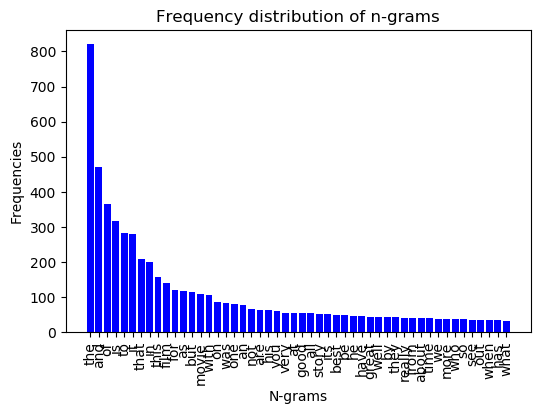

In [321]:
plot_frequency_distribution_of_ngrams(mystery_review)

In [322]:
get_num_words_per_sample(mystery_review)

36.5

### Tokenization

In [57]:
from gensim.utils import simple_preprocess

import nltk
from nltk.corpus import stopwords
from nltk.util import bigrams
from nltk import FreqDist, Text
from nltk.stem import PorterStemmer

In [53]:
#nltk.download('stopwords')
stop_words = stopwords.words('english') 
def remove_stopwords(texts):
    return [word for word in simple_preprocess(str(texts)) if word not in stop_words] 

In [69]:
#data_words_nostops = remove_stopwords(mystery_review)
#data_words_nostops = remove_stopwords(horror_review)
#data_words_nostops = remove_stopwords(kid_review)
#data_words_nostops = remove_stopwords(action_review)
data_words_nostops = remove_stopwords(romance_review)

In [70]:
ps = PorterStemmer()    
data_words_stem = [ps.stem(word) for word in data_words_nostops]

In [71]:
data_bigrams = (list(bigrams(data_words_stem)))
data_bigrams[0:8]

[('movi', 'blaze'),
 ('blaze', 'trail'),
 ('trail', 'greatest'),
 ('greatest', 'romant'),
 ('romant', 'comedi'),
 ('comedi', 'cinema'),
 ('cinema', 'includ'),
 ('includ', 'girl')]

In [72]:
words = data_words_stem + data_bigrams
words [::50]

['movi',
 'com',
 'simpl',
 'great',
 'like',
 'differ',
 'huge',
 'strong',
 'project',
 'frank',
 'screenplay',
 'classic',
 'deserv',
 'oft',
 'rick',
 'perform',
 'na',
 'wartim',
 'big',
 'therefor',
 'caus',
 'may',
 'even',
 'nwell',
 'american',
 'famili',
 'apatow',
 'genr',
 'honest',
 'hold',
 'assist',
 'first',
 'review',
 'genuin',
 'understand',
 'besid',
 'portray',
 'surpris',
 'found',
 'tm',
 'overal',
 'film',
 'suddenli',
 'fan',
 'pioggia',
 'senza',
 'direct',
 'song',
 'laa',
 'hard',
 'movi',
 'danc',
 'greatest',
 'often',
 'close',
 'age',
 'die',
 'play',
 'gener',
 'terrif',
 'charact',
 'stori',
 'clever',
 'top',
 'rediscov',
 'trait',
 'get',
 'hollywood',
 'weekend',
 'call',
 'assign',
 'privaci',
 'turn',
 'us',
 'holocaust',
 'fine',
 'list',
 'annoy',
 'classic',
 'patriarch',
 'wish',
 'talent',
 'laughabl',
 'murder',
 'mean',
 'trovati',
 'order',
 'find',
 'true',
 'releas',
 'anoth',
 'vertigo',
 'act',
 'lead',
 'alway',
 'polic',
 'prove',
 '

In [73]:
mc500 = FreqDist(words).most_common(500)
mc500

[('film', 972),
 ('movi', 968),
 ('one', 506),
 ('love', 406),
 ('time', 378),
 ('charact', 368),
 ('see', 364),
 ('like', 339),
 ('stori', 338),
 ('great', 297),
 ('best', 272),
 ('make', 257),
 ('good', 247),
 ('watch', 238),
 ('perform', 220),
 ('well', 216),
 ('beauti', 198),
 ('go', 197),
 ('scene', 195),
 ('feel', 190),
 ('even', 189),
 ('get', 182),
 ('also', 180),
 ('end', 178),
 ('place', 178),
 ('realli', 176),
 ('act', 176),
 ('much', 167),
 ('ever', 154),
 ('way', 153),
 ('made', 149),
 ('life', 140),
 ('music', 139),
 ('come', 133),
 ('two', 132),
 ('work', 132),
 ('would', 131),
 ('first', 130),
 ('comedi', 129),
 ('think', 129),
 ('play', 128),
 ('take', 127),
 ('thing', 126),
 ('never', 124),
 ('classic', 122),
 ('plot', 121),
 ('peopl', 119),
 ('romanc', 115),
 ('actor', 114),
 ('enjoy', 113),
 ('still', 112),
 ('want', 111),
 ('us', 111),
 ('romant', 108),
 ('interest', 108),
 ('could', 107),
 ('look', 106),
 ('seem', 105),
 ('cast', 103),
 ('funni', 99),
 ('drama', 9

In [74]:
#pd.DataFrame(mc500).to_csv('mystery_500words.csv')
#pd.DataFrame(mc500).to_csv('horror_500words.csv')
#pd.DataFrame(mc500).to_csv('kid_500words.csv')
#pd.DataFrame(mc500).to_csv('action_500words.csv')
pd.DataFrame(mc500).to_csv('romance_500words.csv')